## Customer segmentation and consumer behavior analysis

This is a real sales data set of a UK based retailer

Objective: Segment customers based on buying behavior by applying k-means clustering algorithm to calculate the optimal number of customer segments with similar buying habits (features).

Key business problems addressed:

Apply 80/20 rule to identify the top 20% 
1) Customer segments
2) Products
3) Geographic locations

resulting in 80% of $ sales revenue.

##### Importing the libraries

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")


# # Multiple Output display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

##### Loading the dataset 

In [ ]:
# Importing the dataset

dataset = pd.read_csv('/content/Wholesale customers data.csv')
dataset.shape
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### Missing data & Type of variables

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


###### Analysis: 

Transforming specific variables into categorical variables

In [ ]:
dataset['Channel'] = dataset['Channel'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.8 KB


### Data pre-processing for model

In [ ]:
# Customer Segmentation by $ Revenue & Country

X = dataset
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Creating dummy variables for categorical types
cat_cols = ["Channel", "Region"]
dummies = pd.get_dummies(X[cat_cols])
# dummies.head(5)

# Combining dummy variables and numeric varianbles

X1 = X[num_cols]
X2 = pd.concat([dummies, X1], axis=1)
X = X2

y = dataset["Frozen"]

# Splitting the dataset into the training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

### Principal component analysis

In [ ]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068075,
 0.40473044136593744,
 0.06915995278940283,
 0.03775645653102072,
 0.016031919213089926,
 0.006363379487509001,
 8.365303815691935e-10,
 6.566091152574127e-10,
 3.2921975027264137e-10,
 1.8074577763790618e-34,
 1.5182249641321642e-35]

##### Analysis: I shall choose the top 2 principal components. 

The top 2 principal components explain 86 % variance in the dataset. Beyond the top  2, the marginial gain in variance for adding each principal componenet is significantly reduced.

##### Selecting the top 2 principal components

In [ ]:
# Principal component analysis to take the 2 top components

i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068075, 0.40473044136593744]

### Customer segmentation

Elbow method used for customer segmentation based on the top 2 principal componenets

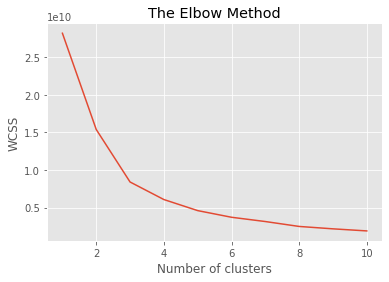

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Analysis: 

Based on the above diagram, the optimal number of customer segmenets is 3. After the first 3 segments, the incremental drop in error for every additional segment results is significantly reduced.

### Distribution of Customers in each segment

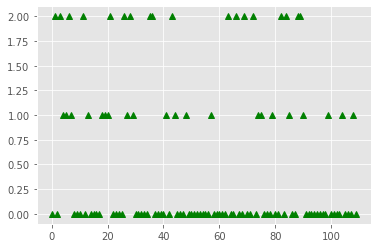

In [ ]:
# Fitting K-Means to the dataset
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g^')
plt.show()

#### Analysis: 

There are 3 optimal customer segments based on their buying behavior, most of the customers belong to Cluster # 1 & 2.

#### Strategy: 

As the retail industry is very competitive, and companies are trying to exploit new market opportunities, our client can try to acquire customers in the 1st customer segment using suitable strategic actions; sales and marketing efforts, promotions, bundling etc.

### Visualizing customer segments

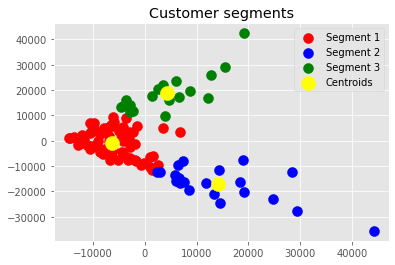

In [ ]:
# Visualising the clusters
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

### Analysis:
    
There are some overlap between segment No. 3 with each of Segment No. 1 & 2 at the boundaries which we need to keep in mind while analyzing customers. 

The k-means clustering algorithm being a un-supervised learning algorithm, we can perform a quick visual check on the model's performance based on the visualization chart.

### Business Strategy:

Customer segment # 1 & 2 have opportunities for growth and future expansion. As the retails industry is a saturated industry, hence customer segment # 3 may already be dominated by other retailers so our client can try to increaese sales in the 2 other cutomer segments (# 1 & 2) through suitable competitive positioning, pricing stratgey, cohesive sales & marketing efforts, promotions, bundling etc.

### Customer Segments

In [ ]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)
# Customer_segments.head(5)

### Customer Segments

In [ ]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

### Customer Segment Features

#### Regions

In [ ]:
Customer_segments_1.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size()

Channel_1  Channel_2
0          1            18
dtype: int64

#### Analysis: 

For customer segment 1: all customers are from Channel 2

For customer segment 2: majority of customer are from Channel 2

For customer segment 3: although majority of customers are from Channel 2, some also came from Channel 1.

In [ ]:
Customer_segments_1.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_2.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_3.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
0         0         1           13
          1         0            2
1         0         0            3
dtype: int64

#### Analysis:
    
For all 3 customer segments: majority of customers are from Region 3

So Region is not a key factor to segment customers.

#### Fresh, Milk & Grocery

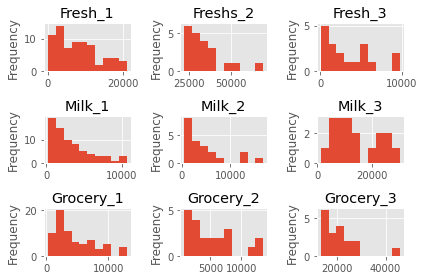

In [ ]:
# Fresh

plt.subplot(331)
plt.title('Fresh_1')
Output = None
Customer_segments_1["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Freshs_2')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Fresh_3')
Output = None
Customer_segments_3["Fresh"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Milk

plt.subplot(334)
plt.title('Milk_1')
Output = None
Customer_segments_1["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Milk_2')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Milk_3')
Output = None
Customer_segments_3["Milk"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Grocery

plt.subplot(337)
plt.title('Grocery_1')
Output = None
Customer_segments_1["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Grocery_2')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Grocery_3')
Output = None
Customer_segments_3["Grocery"].plot(kind = "hist", bins = 10)
plt.tight_layout()

#### Analysis: 

Fresh: Segment # 2 makes significant purchases compared to other segments folloewed by Segment # 3 

Milk: Segment # 1 makes significant purchases compared to other segments
    
Grocery: Segnment # 1 makes significant purchases compared to other segments

#### Frozen, Detergent Paper & Delicassen

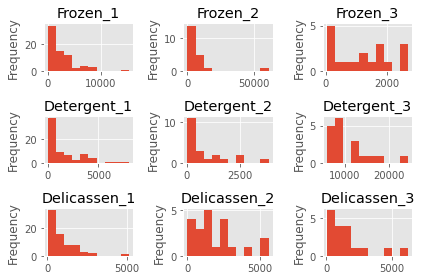

In [ ]:
# Frozen

plt.subplot(331)
plt.title('Frozen_1')
Customer_segments_1["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Frozen_2')
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Frozen_3')
Customer_segments_3["Frozen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Detergent Paper

plt.subplot(334)
plt.title('Detergent_1')
Customer_segments_1["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Detergent_2')
Customer_segments_2["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Detergent_3')
Customer_segments_3["Detergents_Paper"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Delicassen

plt.subplot(337)
plt.title('Delicassen_1')
Customer_segments_1["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Delicassen_2')
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Delicassen_3')
Customer_segments_3["Delicassen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

#### Analysis:
    
Frozen: Segment # 2 makes significant purchases followed by Segment # 3

Detergent_Paper: Segment # 1 is a major purchaser

Delicassen: Segnment # 2 on average makes most purchases, followed by Segmnet # 1

## Applying 80/20 Rule (Pareto principle)

### Top 20% customers, products & geographic locations resulting in 80% of $ sales

##### Importing the dataset

Data source: 

https://archive.ics.uci.edu/ml/datasets/online+retail

In [ ]:
dataset = pd.read_excel('/content/Online Retail.xlsx')
dataset.shape
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### Analysis: 

Missing data are concentrated in the customerID column 

### Missing data

In [ ]:
# Removing missing data

dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Data Exploration

In [ ]:
# Data Exploration

# Quantity
dataset.sort_values("Quantity", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


In [ ]:
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


Quantity is negative may be due to discounts, damaged goods, thrown away etc. I shall remove these values.

In [ ]:
mask = dataset["Quantity"] > 0

dataset = dataset [mask]
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
389620,570482,23380,PACK OF 12 VINTAGE DOILY TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
132735,547689,21528,DAIRY MAID TRADITIONAL TEAPOT,1,2011-03-24 14:55:00,6.95,17757.0,United Kingdom
389621,570482,22615,PACK OF 12 CIRCUS PARADE TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
389622,570482,23377,PACK OF 12 DOLLY GIRL TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
109150,545587,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2011-03-04 09:46:00,1.25,14796.0,United Kingdom


In [ ]:
# For some customers, their information on country is unspecified, lets filter those out

mask = dataset["Country"] != "Unspecified"
dataset = dataset [mask]

In [ ]:
# Creating new column - Revenue in $

dataset["Revenue"] = dataset["Quantity"]*dataset["UnitPrice"]
dataset.head(10).sort_values("Revenue", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
dataset.sort_values("Revenue", ascending = False).tail(5)

# Revenue is 0 for some quantities, as they may have been given away as promotional offers, I shll remove these as well

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,0.0
454464,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,0.0
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.0,15581.0,United Kingdom,0.0


In [ ]:
mask = dataset["Revenue"] > 0

dataset = dataset [mask]
dataset.sort_values("Revenue", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72


In [ ]:
dataset.sort_values("Revenue", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001


In [ ]:
# Encoding variables

dataset["StockCode"] = dataset["StockCode"].astype('object')
dataset["CustomerID"] = dataset["CustomerID"].astype('object')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397640 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397640 non-null  object        
 1   StockCode    397640 non-null  object        
 2   Description  397640 non-null  object        
 3   Quantity     397640 non-null  int64         
 4   InvoiceDate  397640 non-null  datetime64[ns]
 5   UnitPrice    397640 non-null  float64       
 6   CustomerID   397640 non-null  object        
 7   Country      397640 non-null  object        
 8   Revenue      397640 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.3+ MB


### Top 20% of customers driving 80% of revenue

Unique customers:


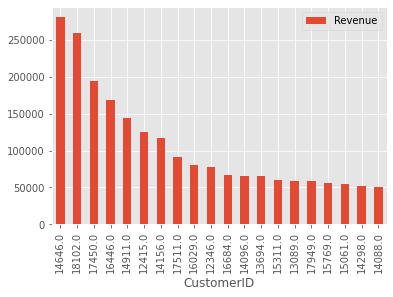

In [ ]:
# Customer ID

print("Unique customers:")
dataset["CustomerID"].nunique()

dataset.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(20).plot(kind = "bar")
                                
plt.show()


In [ ]:
# Customer IDs of top segments

dataset1 = dataset[["CustomerID", "Revenue"]]

print("Top customer segment IDs")
dataset2 = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)

dataset2.head(5)

Top customer segment IDs


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [ ]:
# Identifying the top 20 % customer segments driving 80 % $ sales

h = dataset1["CustomerID"].nunique()
i = round(0.25*h)
print("# of customers in top 25% power segment:", i, "out of", h)

j = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total sales resulting from the top product segment:", round(list(l)[0]), "%")

# of customers in top 25% power segment: 1084 out of 4334
Total sales resulting from the top product segment: 79 %


### Analysis: 

1084 out of total 3877, top 25% of customer segments result in 79% of total $ sales amount.

### Business Strategy:

While the top 25 % customers can be targetted for potential up sell and cross sell potential. 

Considering that the retail industry is very competitive, the remaining 75% of customers can be targetted for future expansion by coordination with sales & marketing teams, discounts, pricing stratagy, bundling products, etc.

### Top 20 % products driving 80 % of $ sales

In [ ]:
# Products

dataset1 = dataset[["Description", "Revenue"]]
print("Unique products:")
dataset1["Description"].nunique()

Unique products:


3877

#Unique products sold by the retailer is 3877.

3877


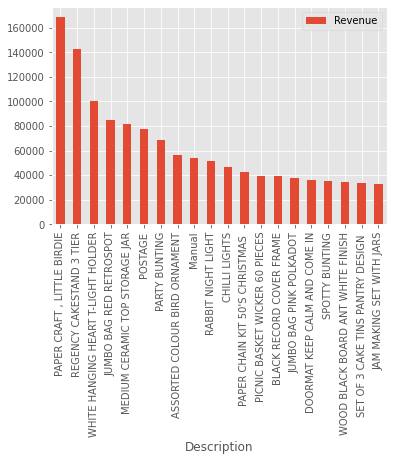

In [ ]:
print(dataset1["Description"].nunique())
dataset2 = dataset1.groupby("Description").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(20).plot(kind = "bar")
plt.show()

In [ ]:
# # Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Identifying the top 20 % products driving 80 % of $ sales

h = dataset1["Description"].nunique()
i = round(0.20*h)
print("# of products in top 20 % segment:", i, "out of", h)

j = dataset2.head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total sales resulting from the top product segment:", round(list(l)[0]), "%")

# of products in top 20 % segment: 775 out of 3877
Total sales resulting from the top product segment: 79 %


### Analysis: 

775 out of total 3877, top 20% of products result in 79% of total $ sales amount.

### Business Startegy:

The top 20% of most popular products (top sellers) sold by the retail company can be bundled with less frequently sold products to increase total $ sales overall, through suitable discounts and promotions to customers. 

### Top 20 % geographic locations driving 80 % of $ sales

##### Top 10 countries by revenue

Countries:
Top 10 countries by $ sales:


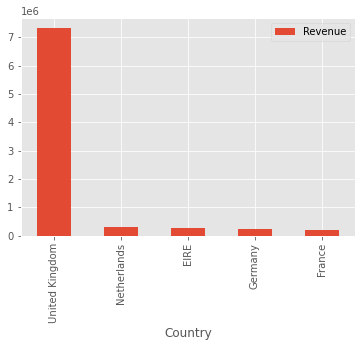

In [ ]:
# Segmenting sales by geographic location

dataset1 = dataset[["Country", "Revenue"]]

print("Countries:")
dataset1["Country"].nunique()
print("Top 10 countries by $ sales:")
dataset2 = dataset1.groupby("Country").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(5).plot(kind = "bar")

# Analysis: 

##### Bottom 20 countries by revenue

Bottom 10 countries by $ sales:


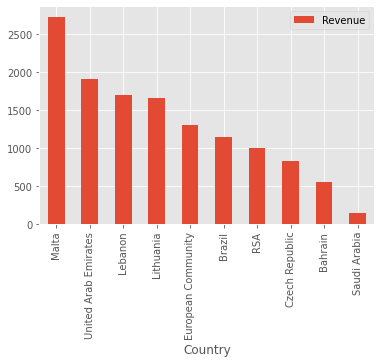

In [ ]:
print("Bottom 10 countries by $ sales:")

dataset2.tail(10).plot(kind = "bar")

# Analysis

In [ ]:
# Identifying the top 20 % geographic locations driving 80 % of $ sales

h = dataset1["Country"].nunique()
i = 1

print("# of products in UK:")

j = dataset2.head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total $ sales resulting from UK:", round(list(l)[0]), "%")

# of products in UK:
Total $ sales resulting from UK: 82 %


In [ ]:
dataset2.head(5)

,Revenue
Country,
United Kingdom,7.308392e+06
Netherlands,2.854463e+05
EIRE,2.655459e+05
Germany,2.288671e+05
France,2.090240e+05


### Analysis: 

UK alone results in 82% of total $ revenue which is expected for a UK based retailer.

### Business Strategy:

The senior management for the retail company should consider expanding to the other countries (fter UK) where they have significant sales such as Neatherland, EIRE, Germany & France for future geographic expansion.